# Milestone 2

Annesa Fadhila Damayanti

Batch 11

## Problems

memprediksi adj close pada saham netflix dengan menggunakan regression terbaik yang ada. serta melihat apakah data tersebut jika di clusterkan dapat tercluster dengan baik.

# Import Libraries

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import mplcursors
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA

# Data Loading

In [14]:
data = pd.read_csv(r'C:\Users\annes\OneDrive\Documents\Hacktive8\assigments\Milestone\p1---ftds011---m2-nesafadhila\netflix.csv')

In [15]:
df = data.copy()
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429
...,...,...,...,...,...,...,...
4876,2021-10-05,640.390015,606.890015,606.940002,634.809998,9534300.0,634.809998
4877,2021-10-06,639.869995,626.359985,628.179993,639.099976,4580400.0,639.099976
4878,2021-10-07,646.840027,630.450012,642.229980,631.849976,3556900.0,631.849976
4879,2021-10-08,643.799988,630.859985,634.169983,632.659973,3271100.0,632.659973


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4881 entries, 0 to 4880
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4881 non-null   object 
 1   High       4881 non-null   float64
 2   Low        4881 non-null   float64
 3   Open       4881 non-null   float64
 4   Close      4881 non-null   float64
 5   Volume     4881 non-null   float64
 6   Adj Close  4881 non-null   float64
dtypes: float64(6), object(1)
memory usage: 267.1+ KB


In [17]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,4881.000000,4881.000000,4881.000000,4881.000000,4.881000e+03,4881.000000
mean,107.003361,103.742674,105.388477,105.434149,1.679949e+07,105.434149
std,159.326383,154.662309,157.007060,157.073188,1.936794e+07,157.073188
min,0.410714,0.346429,0.377857,0.372857,2.856000e+05,0.372857
25%,3.977143,3.838571,3.901429,3.906429,6.286300e+06,3.906429
50%,22.261429,21.150000,21.524286,21.632856,1.082310e+07,21.632856
75%,127.430000,123.589996,125.949997,125.389999,2.015640e+07,125.389999
max,646.840027,630.859985,642.229980,639.099976,3.234140e+08,639.099976


berdasrkan hasil ini, harga saham tertinggi seharga 646.840027 USD dan terendah seharga 0.346429 USD. dengan rata-rata pembelian volume saham sebesar 1.679949 

# EDA

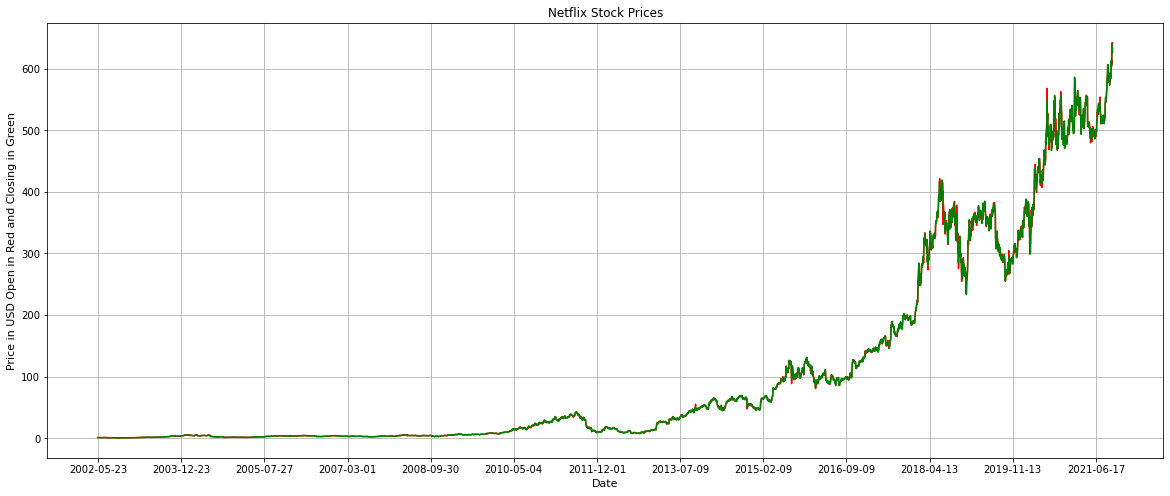

In [18]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(df['Date'], df['Open'], color='Red')
ax.plot(df['Date'], df['Close'], color='Green')

ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD Open in Red and Closing in Green', fontsize='11')
mplcursors.cursor(hover=True)
plt.title('Netflix Stock Prices')
plt.grid()
plt.show()

terlihat bahwa harga saham terendah berada pada tahun 2002 dengan harga mencapai sekitar 0.346429 USD dan harga saham tertinggi pada tahun 2021 dengan harga kurang lebih 646.840027 USD.

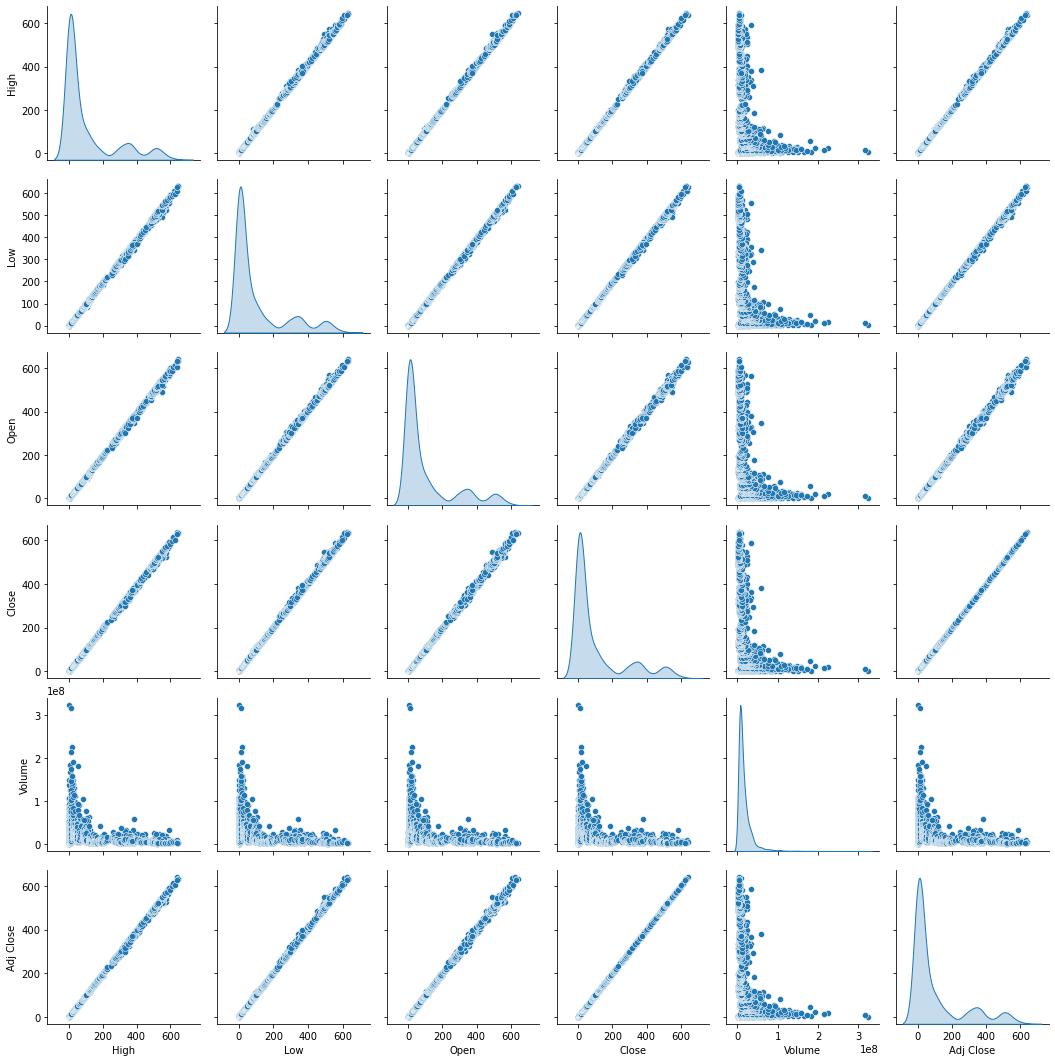

In [19]:
sns.pairplot(df,diag_kind='kde')

terlihat dari plot diatas, bahwa semua variabel berkolerasi dengan baik. terlihat bahwa semua data berkolerasi positif karena data tersebut kearah atas bukan kebawah

<AxesSubplot:>

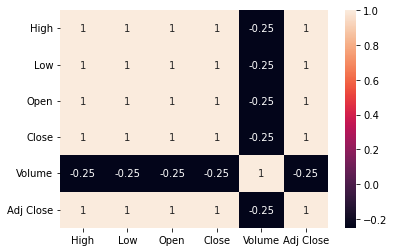

In [20]:
sns.heatmap(df.corr(),annot=True)

terlihat dari tabel heatamap diatas, bahwa semua variabel berkolerasi dengan baik. hanya di bagian volume saja yang kecil nilainya karena volume bersifat personal, dikarenakan banyak pembeli saham yang hanya membeli beberapa saja tergantung besar kecilnya USD yang dimiliki pembeli saham.

In [21]:
# Harga saham Tertinggi
df['High'].max()

646.8400268554688

In [22]:
# Harga saham Terendah
df['Low'].min()

0.3464289903640747

<AxesSubplot:>

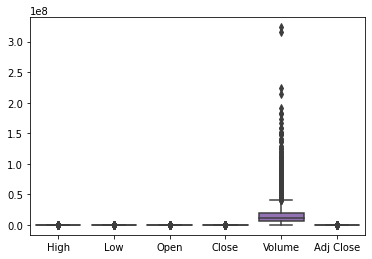

In [23]:
sns.boxplot(data=df)

berdasarkan hasil boxplot tersebut. hanya volume saja yang ada outliers. maka dari itu kami tidak mengikuti volume ke dalam model. karena menurut saya, volume itu hanya besarnya saham yang dibeli oleh pemegang saham. sehingga tidak dapat memprediksi harga saham.

# Data Preprocessing

In [24]:
df.drop(['Date'], inplace=True, axis=1)

saya mendrop date karena menurut saya tanggal perhari pembelian serta harga saham tidak terlalu penting. maksudnya tanpa melihat tanggal perhari harinya, tetap dapat memprediksi dengan baik melalui data bulanannya atau mungkin tahunan.

In [25]:
df.rename(columns={'Adj Close' : 'Adj_Close'}, inplace=True)

In [26]:
# Get Data Inference
df_inf = df.sample(20, random_state=500)

# Reset index
df_real = df.drop(df_inf.index)
df_real.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

In [27]:
X = df_real.drop(['Adj_Close','Volume'], axis=1)
y = df_real['Adj_Close']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [29]:
X_train.shape

(3888, 4)

In [30]:
X_test.shape

(973, 4)

In [31]:
y_train.shape

(3888,)

In [32]:
y_test.shape

(973,)

**karena data sudah balance tidak usah dilakukannya SMOTE atau menyeimbangkan data**

**Data merupakan data angka sehingga tidak perlu untuk di encoder lagi**

***dan juga tidak usah handling missing value dan handling outlliers karena datanya tidak mengandung missing value dan outlierrs***

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Definition, Model Training, Model Evaluation, Model Improvement

## Spectral Clustering

pertama saya melakukan clustering untuk melihat Adj_Close ini jika dibagi menjadi clustering, menjadi berapa cluster.

saya menggunakan spectral cluster karena bagi saya spectral cluster jika melihat visualisasinya terliihat sangat terbagi merata, karena spectral cluster memungkinkan untuk mengelompokan data non-grafik juga.

In [34]:
X_scaled = scaler.transform(X)

In [35]:
pca = PCA()
pca.fit(X)

PCA()

<AxesSubplot:>

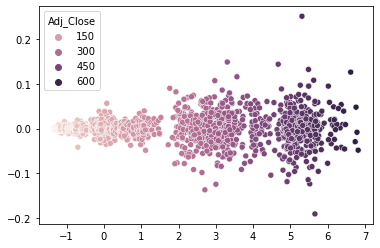

In [36]:
X_pca=PCA(n_components=2).fit_transform(X_scaled)
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=y)

berdasarkan hasil PCA, dataset ini sangat bagus untuk di kelompokan menjadi 4 kelompok.
- pertama dengan data 150 kebawah
- kedua 300 - 150
- ketiga 450 - 300
- terakhir 600 - 450

In [37]:
scl = SpectralClustering(n_clusters=4, gamma=1.0)
scl.fit(X_pca)

SpectralClustering(n_clusters=4)

In [38]:
scl.labels_

array([0, 0, 0, ..., 1, 1, 1])

<AxesSubplot:>

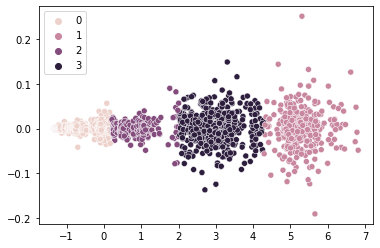

In [39]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=scl.labels_)

seperti inilah visualisasi jika dibagi menjadi 4 cluster. terlihat sangat merata dan tidak ada cluster tersebut yang masuk ke cluster lainnya.

kemudian saya melakukan regresi dengan menggunakan model linear regression, ridge regression, dan decision tree regressor. saya menggunakan model regresi tersebut karena menurut saya model regressi tersebut dapat memprediksi dengan cukup baik.

## Linear Regression

In [40]:
lin_model = LinearRegression()
lin_model.fit(X_train_scaled,y_train)

LinearRegression()

In [41]:
print('Linear Regression Score Train : ', lin_model.score(X_train_scaled,y_train))
print('Linear Regression Score Test : ', lin_model.score(X_test_scaled,y_test))

Linear Regression Score Train :  1.0
Linear Regression Score Test :  1.0


nilai train dan test nya bisa di bilang fit karena nilai tersebut sama dan sempurna. teteapi dalam hal memprediksi tidak ada yang sempurna.

In [42]:
y_train_pred = lin_model.predict(X_train_scaled)
y_test_pred = lin_model.predict(X_test_scaled)

In [43]:
print('MAE train Linear Regression = ', mean_absolute_error(y_train, y_train_pred))
print('MAE test Linear Regression = ', mean_absolute_error(y_test, y_test_pred))

print('MSE train Linear Regression = ', mean_squared_error(y_train, y_train_pred))
print('MSE test Linear Regression = ', mean_squared_error(y_test, y_test_pred))

print('RMSE train Linear Regression = ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE test Linear Regression = ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

print('r2score train Linear Regression = ', r2_score(y_train, y_train_pred))
print('r2score test Linear Regression = ', r2_score(y_test, y_test_pred))

MAE train Linear Regression =  6.159140698601469e-14
MAE test Linear Regression =  6.432276203050528e-14
MSE train Linear Regression =  6.517720176237065e-27
MSE test Linear Regression =  6.980054377609907e-27
RMSE train Linear Regression =  8.073239855372232e-14
RMSE test Linear Regression =  8.354671972980092e-14
r2score train Linear Regression =  1.0
r2score test Linear Regression =  1.0


MAE, MSE, RMSE hasil train dan testnya tidak berbeda jauh yang artinya actual data dapat diprediksi dengan baik.

berdasarkan hasil RMSE dan MAE dapat dibandingkan, dapat dikatakan bahwa model ini baik dalam memprediksi. karena nilai MAE dan RMSE tidak terlalu jauh yang artinya tidak ada outlier dalam meprediksi model. tetapi dengan menggunakan model ini ada error sebesar 8% dilihat dari hasil RMSEnya.

tetapi model ini sudah bagus dalam memprediksi.

berdasarkan nilai r2score, bahwa model ini bagus digunakan. karena nilai r2score mencapai 1

**Karena dalam Linear Regression no possible to hyperparamater, jadi saya akan mencoba linear lainnya, yaitu ridge**

tanpa menngunakan hyperparameter atau model improvement pun model ini sudah bagus dalam memprediksi harga saham.

## Ridge Regression

In [44]:
ridge = Ridge(alpha=10567)
ridge.fit(X_train_scaled,y_train)

Ridge(alpha=10567)

In [45]:
print('Ridge Regression Score Train : ', ridge.score(X_train_scaled,y_train))
print('Ridge Regression Score Test : ', ridge.score(X_test_scaled,y_test))

Ridge Regression Score Train :  0.8361654799264299
Ridge Regression Score Test :  0.8357040704301996


nilai train dan test nya bisa di bilang fit karena bernilai sama dan hanya berbeda 0.00 sekian saja

In [46]:
y_train_pred_ridge = ridge.predict(X_train_scaled)
y_test_pred_ridge = ridge.predict(X_test_scaled)

In [47]:
print('MAE train Ridge Before Hyperparameter = ', mean_absolute_error(y_train, y_train_pred_ridge))
print('MAE test Ridge Before Hyperparameter = ', mean_absolute_error(y_test, y_test_pred_ridge))

print('MSE train Ridge Before Hyperparameter = ', mean_squared_error(y_train, y_train_pred_ridge))
print('MSE test Ridge Before Hyperparameter = ', mean_squared_error(y_test, y_test_pred_ridge))

print('RMSE train Ridge Before Hyperparameter = ', np.sqrt(mean_squared_error(y_train, y_train_pred_ridge)))
print('RMSE test Ridge Before Hyperparameter = ', np.sqrt(mean_squared_error(y_test, y_test_pred_ridge)))

print('r2score train Ridge Before Hyperparameter = ', r2_score(y_train, y_train_pred_ridge))
print('r2score test Ridge Before Hyperparameter = ', r2_score(y_test, y_test_pred_ridge))

MAE train Ridge Before Hyperparameter =  48.67598249190227
MAE test Ridge Before Hyperparameter =  50.49507879999032
MSE train Ridge Before Hyperparameter =  3997.8249645026112
MSE test Ridge Before Hyperparameter =  4227.15924650166
RMSE train Ridge Before Hyperparameter =  63.22835569981724
RMSE test Ridge Before Hyperparameter =  65.01660746687465
r2score train Ridge Before Hyperparameter =  0.8361654799264299
r2score test Ridge Before Hyperparameter =  0.8357040704301996


MAE, MSE, RMSE hasil train dan testnya agak sedikit berbeda jauh yang artinya actual data dapat memprediksi dengan cukup baik.

berdasrkan hasil RMSE dan MAE dapat dibandingkan, dapat dikatakan bahwa model ini cukup baik dalam memprediksi. karena nilai MAE dan RMSE tidak terlalu jauh yang artinya tidak ada outlier dalam mmeprediksi model. tetapi model ini memiliki tingkat error sebesar 63% - 65%.

berdasrkan nilai r2score, bahwa model ini cukup bagus digunakan. karena nilai r2score mendekati 1

menurut saya, model regressi ini sudah cukup baik dalam memprediksi. tetapi saya ingin melihat apakah ada nilai yang lebih baik dari model regresi ini untuk memprediksi.

### Hyperparameter Ridge Regression

In [48]:
# Performing GridSearchCV with Cross Validation Technique

params_ridge = {'alpha': (np.logspace(-5, 0, 10))}
ridge_model = Ridge(normalize=True)
rid_model = GridSearchCV(ridge_model, params_ridge, cv=10)
rid_model.fit(X_train_scaled,y_train)
print('Best Params Ridge Regression : ', rid_model.best_params_)
print('Best Score Ridge Regression : ', rid_model.best_score_)

c:\Users\annes\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
c:\Users\annes\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

Best Params Ridge Regression :  {'alpha': 1e-05}
Best Score Ridge Regression :  0.9999993935861768


c:\Users\annes\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
c:\Users\annes\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklea

menurut gridsearchCV, ini adalah nilai yang bagus untuk dilakukannya Ridge Regression

Best Params Ridge Regression :  {'alpha': 1e-05}

Best Score Ridge Regression :  0.9999993935861768

### Setelah dilakukannya Hyperparameter

In [49]:
ridge_after = Ridge(alpha= 1e-05, normalize=True)
ridge_after.fit(X_train_scaled,y_train)

c:\Users\annes\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=1e-05, normalize=True)

In [50]:
print('Ridge Regression Score Train After Hyperparameter : ', ridge_after.score(X_train_scaled,y_train))
print('Ridge Regression Score Test After Hyperparameter : ', ridge_after.score(X_test_scaled,y_test))

Ridge Regression Score Train After Hyperparameter :  0.9999994268056894
Ridge Regression Score Test After Hyperparameter :  0.9999995575818111


setelah dilakukannya hypermarameter dan mendapatkan nilai yang bagus untuk memprediksi menggunkaan ridge regression, hasil nilai train dan test berubah menjadi mendekati 1, maka dari itu ridge regression setelah dilakukan hyperparameter menjadi lebih baik dalam memprediksi.

In [51]:
y_train_pred_ridge_after = ridge_after.predict(X_train_scaled)
y_test_pred_ridge_after = ridge_after.predict(X_test_scaled)

In [52]:
print('MAE train Ridge After Hyperparameter = ', mean_absolute_error(y_train, y_train_pred_ridge_after))
print('MAE test Ridge After Hyperparameter = ', mean_absolute_error(y_test, y_test_pred_ridge_after))

print('MSE train Ridge After Hyperparameter = ', mean_squared_error(y_train, y_train_pred_ridge_after))
print('MSE test Ridge After Hyperparameter = ', mean_squared_error(y_test, y_test_pred_ridge_after))

print('RMSE train Ridge After Hyperparameter = ', np.sqrt(mean_squared_error(y_train, y_train_pred_ridge_after)))
print('RMSE test Ridge After Hyperparameter = ', np.sqrt(mean_squared_error(y_test, y_test_pred_ridge_after)))

print('r2score train Ridge After Hyperparameter = ', r2_score(y_train, y_train_pred_ridge_after))
print('r2score test Ridge After Hyperparameter = ', r2_score(y_test, y_test_pred_ridge_after))

MAE train Ridge After Hyperparameter =  0.049876458779619624
MAE test Ridge After Hyperparameter =  0.04820715119413018
MSE train Ridge After Hyperparameter =  0.013986860177217854
MSE test Ridge After Hyperparameter =  0.011382948698700903
RMSE train Ridge After Hyperparameter =  0.11826605674164441
RMSE test Ridge After Hyperparameter =  0.10669090260514671
r2score train Ridge After Hyperparameter =  0.9999994268056894
r2score test Ridge After Hyperparameter =  0.9999995575818111


setelah dilakukannya hyperparameter dan dicari best parameter untuk di jadikan nilai alpha untuk ridge menghasilkan nilai tersebut.

berdasarkan hasilnya MAE, MSE, RMSE hasil train dan testnya tidak jauh berbeda yang artinya actual data baik untuk memprediksi.

berdasrkan hasil RMSE dan MAE dapat dibandingkan, dapat dikatakan bahwa model ini baik dalam memprediksi. karena nilai MAE dan RMSE tidak terlalu jauh yang artinya tidak ada outlier dalam meprediksi model.

berdasrkan nilai r2score, bahwa model ini bagus digunakan. karena nilai r2score mendekati 1

berbeda dengan hasil sebelum dilakukannya hyperparameter, dimana nilai nya train dan test cukup jauh berbeda. walaupun dapat memprediksi dengan cukup baik. tetapi dengan menggunakan hyperparamter ini, model jadi lebih mengetahui mana nilai yang cocok digunakan dalam memprediksi.

## Decision Tree

In [53]:
tree_reg = DecisionTreeRegressor(random_state=50)
tree_reg.fit(X_train_scaled,y_train)

DecisionTreeRegressor(random_state=50)

In [54]:
print('Decision Tree Regression Score Train : ', tree_reg.score(X_train_scaled,y_train))
print('Decision Tree Regression Score Test : ', tree_reg.score(X_test_scaled,y_test))

Decision Tree Regression Score Train :  1.0
Decision Tree Regression Score Test :  0.9999831779222289


In [55]:
y_train_pred_tree = tree_reg.predict(X_train_scaled)
y_test_pred_tree = tree_reg.predict(X_test_scaled)

In [56]:
print('MAE train Decision Tree = ', mean_absolute_error(y_train, y_train_pred_tree))
print('MAE test Decision Tree = ', mean_absolute_error(y_test, y_test_pred_tree))

print('MSE train Decision Tree = ', mean_squared_error(y_train, y_train_pred_tree))
print('MSE test Decision Tree = ', mean_squared_error(y_test, y_test_pred_tree))

print('RMSE train Decision Tree = ', np.sqrt(mean_squared_error(y_train, y_train_pred_tree)))
print('RMSE test Decision Tree = ', np.sqrt(mean_squared_error(y_test, y_test_pred_tree)))

print('r2score train Decision Tree = ', r2_score(y_train, y_train_pred_tree))
print('r2score test Decision Tree = ', r2_score(y_test, y_test_pred_tree))

MAE train Decision Tree =  0.0
MAE test Decision Tree =  0.19560197317342967
MSE train Decision Tree =  0.0
MSE test Decision Tree =  0.4328141408101291
RMSE train Decision Tree =  0.0
RMSE test Decision Tree =  0.6578861153802602
r2score train Decision Tree =  1.0
r2score test Decision Tree =  0.9999831779222289


MAE, MSE, RMSE hasil train dan testnya tidak berbeda jauh yang artinya actual data dan hasil prediksi dapat memprediksi dengan baik.

berdasrkan hasil RMSE dan MAE dapat dibandingkan, dapat dikatakan bahwa model ini baik dalam memprediksi. karena nilai MAE dan RMSE tidak terlalu jauh yang artinya tidak ada outlier dalam mmeprediksi model

berdasrkan nilai r2score, bahwa model ini bagus digunakan. karena nilai r2score mencapai 1

**karena nilai sudah bagus dalam memprediksi, maka dari itu saya tidak melakukan hyperparameter karena data sudah menujukan hasil prediksi dengan baik**

## Pengambil Kesimpulan INTERCEPT dan SLOPE

In [57]:
# Linear Regression
intercept_lin = lin_model.intercept_
slope_lin = lin_model.coef_

# Ridge Regression
intercept_ridge = ridge_after.intercept_
slope_ridge = ridge_after.coef_


print('Intercept Linear Regression : ', intercept_lin)
print('Slope Linear Regression : ', slope_lin)
print('Intercept Ridge Regression : ', intercept_ridge)
print('Slope Ridge Resgrssion : ', slope_ridge)

Intercept Linear Regression :  104.30596532455718
Slope Linear Regression :  [ 3.36902152e-14 -6.29402728e-15  5.20816031e-14  1.56210125e+02]
Intercept Ridge Regression :  104.30596532455718
Slope Ridge Resgrssion :  [  8.15624574   7.90724141  -5.36739699 145.51320054]


berdasarkan hasil intercept, karena nilai jauh mendekati 0 maka intercept memiliki makna yang berarti antara variable X dan Y

berdasarkan hasil tersebut, menurut saya yang baik untuk memprediksi adalah ridge regression. karena nilai error ridge regression hanya mencapai 0.1 saja dan tidak berbeda jauh train dan test nya, jadi bagi saya ridge regression memprediksi dengan baik.

karena linear regression menghasilnya error hingga 8 dan decision tree menghasilkan error 0, tetapi bagi saya dalam hal prediksi tidak ada yang 100% benar dan 100% salah. berdasarkan hasil decision tree regressor hasil train dan test pada RMSE agak berbeda jauh yanga artinya data tersebut overfit.

saya akan menggunakan ridge regression kedalam model inference.

# Model Inference

In [58]:
df_inf

,High,Low,Open,Close,Volume,Adj_Close
0,4.092857,3.928571,4.011429,4.041429,7041300.0,4.041429
1,30.961430,29.942858,30.415714,30.709999,18326700.0,30.709999
2,3.522857,3.485714,3.510000,3.514286,3591000.0,3.514286
3,365.149994,355.690002,357.390015,360.869995,4777300.0,360.869995
4,316.799988,306.600006,307.359985,315.480011,10427100.0,315.480011
5,221.149994,216.320007,221.000000,217.500000,9123100.0,217.500000
6,86.750000,84.500000,85.430000,85.839996,55681200.0,85.839996
7,3.982857,3.874286,3.964286,3.964286,11428200.0,3.964286
8,44.592857,43.599998,43.959999,44.172855,12528600.0,44.172855
9,6.744286,6.528571,6.574286,6.608571,9739800.0,6.608571


In [59]:
dfinf = df_inf.drop(['Volume','Adj_Close'], axis=1)
dfinf_y = df_inf['Adj_Close']

In [60]:
# Membuat Pipeline
pipe_ridge = Pipeline([('scaler', StandardScaler()), ('model', Ridge(alpha= 1e-05, normalize=True))])

In [61]:
# Save File PipeLine
with open('Pipeline_Ridge_Regression.pkl', 'wb') as file_1:
    pickle.dump(pipe_ridge, file_1)

In [62]:
dfinf_ridge = pipe_ridge.fit(dfinf, dfinf_y)

c:\Users\annes\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [63]:
dfinf_pred = dfinf_ridge.predict(dfinf)

In [64]:
# Menjadikan df inf prediksi dataframe
dfinf_pred_final = pd.DataFrame(dfinf_pred, columns=['Prediction'])

# Menggabungkan DataFrame data inference
dfinf_final = pd.concat([df_inf,dfinf_pred_final], axis=1)

In [65]:
dfinf_final

,High,Low,Open,Close,Volume,Adj_Close,Prediction
0,4.092857,3.928571,4.011429,4.041429,7041300.0,4.041429,4.042128
1,30.961430,29.942858,30.415714,30.709999,18326700.0,30.709999,30.642453
2,3.522857,3.485714,3.510000,3.514286,3591000.0,3.514286,3.519147
3,365.149994,355.690002,357.390015,360.869995,4777300.0,360.869995,361.132860
4,316.799988,306.600006,307.359985,315.480011,10427100.0,315.480011,314.996459
5,221.149994,216.320007,221.000000,217.500000,9123100.0,217.500000,217.432515
6,86.750000,84.500000,85.430000,85.839996,55681200.0,85.839996,85.791922
7,3.982857,3.874286,3.964286,3.964286,11428200.0,3.964286,3.957107
8,44.592857,43.599998,43.959999,44.172855,12528600.0,44.172855,44.167388
9,6.744286,6.528571,6.574286,6.608571,9739800.0,6.608571,6.636176


berdasrkan hasil perdiksi tersebut, terlihat sedikit sekali perbedaan dari data aktual(adj_close), yang artinya model kami mmeprediksi dengan baik dan juga memiliki sedikit error.

# Kesimpulan

terlihat dari tabel heatamap, bahwa semua variabel berkolerasi dengan baik. hanya di bagian volume saja yang kecil nilainya karena volume bersifat personal, dikarenakan banyak pembeli saham yang hanya membeli beberapa saja tergantung besar kecilnya USD yang dimiliki pembeli saham.

menurut saya, besar kecilnya volume tergantung kepemilikan USD yang dimiliki calon pembeli saham. maka dari itu, volume tidak berkolerasi dengan baik pada harga saham. maka dari itu saya mendrop volume dalam memprediksi.

saya mendrop date karena menurut saya tanggal perhari pembelian serta harga saham tidak terlalu penting. maksudnya tanpa melihat tanggal perhari harinya, tetap dapat memprediksi dengan baik melalui data bulanannya atau mungkin tahunan.

jika diklusterkan, data Adj_Close jika diclusterkan, sangat bagus dibagi menjadi 4 cluster. saya menggunakan spectral cluster karena bagi saya spectral cluster jika melihat visualisasinya terliihat sangat terbagi merata, karena spectral cluster memungkinkan untuk mengelompokan data non-grafik juga.

MAE train Linear Regression =  6.159140698601469e-14

MAE test Linear Regression =  6.432276203050528e-14

MSE train Linear Regression =  6.517720176237065e-27

MSE test Linear Regression =  6.980054377609907e-27

RMSE train Linear Regression =  8.073239855372232e-14

RMSE test Linear Regression =  8.354671972980092e-14

r2score train Linear Regression =  1.0

r2score test Linear Regression =  1.0

----
MAE train Ridge Before Hyperparameter =  48.67598249190227

MAE test Ridge Before Hyperparameter =  50.49507879999032

MSE train Ridge Before Hyperparameter =  3997.8249645026112

MSE test Ridge Before Hyperparameter =  4227.15924650166

RMSE train Ridge Before Hyperparameter =  63.22835569981724

RMSE test Ridge Before Hyperparameter =  65.01660746687465

r2score train Ridge Before Hyperparameter =  0.8361654799264299

r2score test Ridge Before Hyperparameter =  0.8357040704301996

***VS***

MAE train Ridge After Hyperparameter =  0.049876458779619624

MAE test Ridge After Hyperparameter =  0.04820715119413018

MSE train Ridge After Hyperparameter =  0.013986860177217854

MSE test Ridge After Hyperparameter =  0.011382948698700903

RMSE train Ridge After Hyperparameter =  0.11826605674164441

RMSE test Ridge After Hyperparameter =  0.10669090260514671

r2score train Ridge After Hyperparameter =  0.9999994268056894

r2score test Ridge After Hyperparameter =  0.9999995575818111

----

MAE train Decision Tree =  0.0

MAE test Decision Tree =  0.19560197317342967

MSE train Decision Tree =  0.0

MSE test Decision Tree =  0.4328141408101291

RMSE train Decision Tree =  0.0

RMSE test Decision Tree =  0.6578861153802602

r2score train Decision Tree =  1.0

r2score test Decision Tree =  0.9999831779222289


berdasarkan hasil terrsebut, menurtu kami yang paling bagus adalah memprediksi dengan menggunakan ridge regrression setelah dilakukannya hyperparameter yang menentukan nilai alpha yang terbaik untuk dilakukannya regressi prediksi. karena ridge regression selain nilai train dan test nya tidak terlalu jauh, juga memiliki tingkat error paling kecil dari model lainnya.

karena pada model lainnya terdapat nilai 1.0 yang artinya nilai tersebut sempurna, tetapi menurut saya jika memprediksi maka kemungkinan untuk prediksi tersebut benar atau salah itu tidak 100%. memang bisa saja prediksi itu benar atau salah tetapi bagi saya jika hasil prediksi tersebut semua data dapat memprediksi 100% benar atau 100% salah maka kemungkinan ada miss pada datanya, maka perlu di lihat kembali data serta prediksinya.

maka dapat saya simpulkan bahwa yang baik untuk memprediksi adalah ridge regression. sehingga saya menjadikan ridge regression ke dalam model inference saya atau random sample yang ada pada data tersebut.

berdasarkan hasil perdiksi pada model infernece tersebut, terlihat sedikit sekali perbedaan dari data aktual(adj_close), yang artinya model yakni ridge regression kami memprediksi dengan baik dan juga memiliki sedikit error.